<a href="https://colab.research.google.com/github/atsu8864/Graduation-Research/blob/main/usb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd
os.chdir('./sample_data')
os.mkdir('./dataset')
os.chdir('./dataset')

/content


In [ ]:
import os
import glob
DIR = '/content/sample_data/usb/usb3-a'

print(sum(os.path.isfile(os.path.join(DIR, name)) for name in os.listdir(DIR)))


print(len(glob.glob('./usb/usb-c/*.jpg')))

101
100


In [ ]:
# import shutil
# shutil.rmtree('/content/sample_data/dataset')

In [ ]:
#@title #downloaded stl10_data


from __future__ import print_function

import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
    
if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib # ugly but works
else:
    import urllib

try:
    from imageio import imsave
except:
    from scipy.misc import imsave

print(sys.version_info) 

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
TRAIN_DATA_PATH = './data/stl10_binary/train_X.bin'

# path to the binary train file with labels
TRAIN_LABEL_PATH = './data/stl10_binary/train_y.bin'

TEST_DATA_PATH = './data/stl10_binary/test_X.bin'
TEST_LABEL_PATH = './data/stl10_binary/test_y.bin'
def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle
    # if you will use a learning algorithm like CNN, since they like
    # their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

def save_images(images, labels, a):
    print("Saving images to disk")
    i = 0
    for image in images:
        label = labels[i]
        directory = './img_' + a + '/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        #print(filename)
        save_image(image, filename)
        i = i+1
    
if __name__ == "__main__":
    # download data if needed
    download_and_extract()

    # test to check if the image is read correctly
    with open(TRAIN_DATA_PATH) as f:
        image = read_single_image(f)
        plot_image(image)

    # test to check if the whole dataset is read correctly
    images = read_all_images(TRAIN_DATA_PATH)
    print(images.shape)

    labels = read_labels(TRAIN_LABEL_PATH)
    print(labels.shape)

    save_images(images, labels, 'train')


    images = read_all_images(TEST_DATA_PATH)
    print(images.shape)

    labels = read_labels(TEST_LABEL_PATH)
    print(labels.shape)

    # save images to disk
    save_images(images, labels, 'test')


ここから

In [ ]:
shutil.rmtree('/content/sample_data/triming_usb')

In [ ]:
import shutil
import os
os.chdir('/content/sample_data')
shutil.copytree('/content/drive/MyDrive/Colaboratory/dataset/triming_usb', '/content/sample_data/triming_usb')

'/content/sample_data/triming_usb'

In [ ]:
import glob
import os
from PIL import Image

files = glob.glob('/content/sample_data/triming_usb/*/*.jpg')

for f in files:
    img = Image.open(f).convert('RGB')
    img_resize = img.resize((int(96), int(96)))
    img_resize.save(f)
    w, h = img_resize.size
    if w != 96:
        prnt(os.path(f))
    elif h != 96:
        rint(os.path(f))

In [ ]:
import os
os.chdir('./sample_data')

FileNotFoundError: ignored

In [ ]:
!pip install icrawler

In [ ]:
from IPython.display import display

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import pandas as pd
import matplotlib.pyplot as plt

import time
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib


In [ ]:
from icrawler.builtin import BingImageCrawler
def dl(a, b=""):
    if b == "":
        b = a
    crawler = BingImageCrawler(storage={"root_dir": b})
    crawler.crawl(keyword=a, max_num=200)

In [ ]:
model_url = "https://tfhub.dev/google/bit/m-r50x1/1"
#model_url = "https://tfhub.dev/google/bit/s-r50x1/1"
module = hub.KerasLayer(model_url)

In [ ]:
tf_flowers_labels = ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
stl10_labels = ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']
usb_labels = ['usb-c', 'lightning', 'micro2-b']
food_labels = []

In [ ]:
import os
import glob
from PIL import Image

files = glob.glob('/content/sample_data/triming_usb/*/*.jpg')

for f in files:
    try:
        img = Image.open(f)
        img_resize = img.resize((int(96), int(96)))
        title, ext = os.path.splitext(f)
        img_resize.save(title + '.jpg')
        w, h = img_resize.size
        if w != 96:
            print(os.path(f))
            os.remove(title + '.jpg')
        elif h != 96:
            print(os.path(f))
            os.remove(title + 'jpg')
    except:
        print(f)
        os.remove(f)

In [ ]:
#vmm_labels = []
#vmm_labels = os.listdir(path='/content/drive/My Drive/Colaboratory/VMMRdb'


In [ ]:
#data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
#                                   fname='flower_photos', untar=True)

#select small_image or usb or dataset
data_dir = pathlib.Path('/content/sample_data/triming_usb/')


IMG_HEIGHT = 96
IMG_WIDTH = 96

CLASS_NAMES = usb_labels  # from plotting helper functions above
NUM_CLASSES = len(CLASS_NAMES)
num_examples = len(list(data_dir.glob('*/*.jpg')))

def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  
  return tf.where(parts[-2] == CLASS_NAMES)[0][0]

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  return img  

def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  features = {'image': img, 'label': label}
  return features

list_ds_train = tf.data.Dataset.list_files(str(data_dir/'*/*.jpg'))
ds = list_ds_train.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# list_ds_test = tf.data.Dataset.list_files(str(test_data_dir/'*/*'))
# ds_test = list_ds_test.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [ ]:
num_examples

300

In [ ]:
train_split = 0.8
val_split = 0.1
num_train = int(train_split * num_examples)
num_val = int(val_split * num_examples)
ds_train = ds.take(num_train)
remain = ds.skip(num_train)
ds_val = remain.take(num_val)
ds_test = remain.skip(num_val)

DATASET_NUM_TRAIN_EXAMPLES = num_examples

In [ ]:
class MyBiTModel(tf.keras.Model):

  def __init__(self, num_classes, module):
    super().__init__()

    self.num_classes = num_classes
    self.head = tf.keras.layers.Dense(num_classes, kernel_initializer='zeros')
    self.bit_model = module

  def call(self, images):
    bit_embedding = self.bit_model(images)
    return self.head(bit_embedding)
  
model = MyBiTModel(num_classes=NUM_CLASSES, module = module)


In [ ]:
IMAGE_SIZE = ">96x96 px"
DATASET_SIZE = "<20k examples"

if IMAGE_SIZE == "=<96x96 px":
  RESIZE_TO = 160
  CROP_TO = 128
else:
  RESIZE_TO = 512
  CROP_TO = 480

if DATASET_SIZE == "<20k examples":
  SCHEDULE_LENGTH = 500
  SCHEDULE_BOUNDARIES = [200, 300, 400]
elif DATASET_SIZE == "20k-500k examples":
  SCHEDULE_LENGTH = 100000
  SCHEDULE_BOUNDARIES = [3000, 6000, 9000]
else:
  SCHEDULE_LENGTH = 20000
  SCHEDULE_BOUNDARIES = [6000, 12000, 18000]

In [ ]:
BATCH_SIZE = 64
SCHEDULE_LENGTH = SCHEDULE_LENGTH * 512 / BATCH_SIZE

STEPS_PER_EPOCH = 10

def cast_to_tuple(features):
  return (features['image'], features['label'])

def preprocess_train(features):
  features['image'] = tf.image.random_flip_left_right(features['image'])
  features['image'] = tf.image.resize(features['image'], [RESIZE_TO, RESIZE_TO])
  features['image'] = tf.image.random_crop(features['image'], [CROP_TO, CROP_TO, 3])
  features['image'] = tf.cast(features['image'], tf.float32) / 255.0
  return features

def preprocess_test(features):
  features['image'] = tf.image.resize(features['image'], [RESIZE_TO, RESIZE_TO])
  features['image'] = tf.cast(features['image'], tf.float32) / 255.0
  return features

pipeline_train = (ds_train
                 .shuffle(10000)
                 .repeat(int(SCHEDULE_LENGTH * BATCH_SIZE / DATASET_NUM_TRAIN_EXAMPLES * STEPS_PER_EPOCH) + 1 + 50)
                 .map(preprocess_train, num_parallel_calls=8)
                 .batch(BATCH_SIZE)
                 .map(cast_to_tuple)
                 .prefetch(2))

pipeline_val = (ds_val
                 .map(preprocess_test, num_parallel_calls=1)
                 .map(cast_to_tuple)
                 .batch(BATCH_SIZE)
                 .prefetch(2))
pipeline_test = (ds_test
                 .map(preprocess_test, num_parallel_calls=1)
                 .map(cast_to_tuple)
                 .batch(BATCH_SIZE))

In [ ]:
lr = 0.003 * BATCH_SIZE / 512

lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=SCHEDULE_BOUNDARIES,
                                                                  values=[lr, lr*0.1, lr*0.001, lr*0.0001])
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

NUM_EPOCH = 5

history = model.fit(
    pipeline_train,
    batch_size=BATCH_SIZE,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs= NUM_EPOCH, #int(SCHEDULE_LENGTH/STEPS_PER_EPOCH),
    validation_data=pipeline_val
)

Epoch 1/5
10/10 [==============================] - 18s 2s/step - loss: 0.7252 - accuracy: 0.7812 - val_loss: 0.3436 - val_accuracy: 0.9000
Epoch 2/5
10/10 [==============================] - 17s 2s/step - loss: 0.2547 - accuracy: 0.9172 - val_loss: 0.2015 - val_accuracy: 0.9333
Epoch 3/5
10/10 [==============================] - 17s 2s/step - loss: 0.1800 - accuracy: 0.9438 - val_loss: 0.2353 - val_accuracy: 0.9333
Epoch 4/5
10/10 [==============================] - 17s 2s/step - loss: 0.1313 - accuracy: 0.9625 - val_loss: 0.1323 - val_accuracy: 0.9333
Epoch 5/5
10/10 [==============================] - 17s 2s/step - loss: 0.0981 - accuracy: 0.9703 - val_loss: 0.1317 - val_accuracy: 1.0000


In [ ]:
print("Evaluate")
result = model.evaluate(pipeline_test)
dict(zip(model.metrics_names, result))

Evaluate
1/1 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.9667


{'accuracy': 0.9666666388511658, 'loss': 0.13946588337421417}

In [ ]:
export_module_dir = '/tmp/my_saved_bit_model/'
tf.saved_model.save(model, export_module_dir)

INFO:tensorflow:Assets written to: /tmp/my_saved_bit_model/assets


INFO:tensorflow:Assets written to: /tmp/my_saved_bit_model/assets


In [ ]:
# export_module_dir = "/content/drive/My Drive/Colaboratory/save_model"
# tf.saved_model.save(model, export_module_dir)

In [ ]:
saved_module = hub.KerasLayer(export_module_dir, trainable=True)

In [ ]:
#@title plot the wrong image 
# Show the MAX_PREDS highest scoring labels:
MAX_PREDS = 5
# Do not show labels with lower score than this:
MIN_SCORE = 0.8 

def show_preds(logits, image, correct_usb_label=None, tf_usb_logits=False):

  if len(logits.shape) > 1:
    logits = tf.reshape(logits, [-1])

  fig, axes = plt.subplots(1, 2, figsize=(7, 1), squeeze=False)

  ax1, ax2 = axes[0]

  ax1.axis('off')
  ax1.imshow(image)
  if correct_usb_label is not None:
    ax1.set_title(usb_labels[correct_usb_label])
  classes = []
  scores = []
  logits_max = np.max(logits)
  softmax_denominator = np.sum(np.exp(logits - logits_max))
  for index, j in enumerate(np.argsort(logits)[-MAX_PREDS::][::-1]):
    score = 1.0/(1.0 + np.exp(-logits[j]))
    if score < MIN_SCORE:
        pass 
        #break
    if not tf_usb_logits:
      # predicting in imagenet label space
      classes.append(imagenet_int_to_str[j])
    else:
      # predicting in tf_usb label space
      classes.append(usb_labels[j])
    scores.append(np.exp(logits[j] - logits_max)/softmax_denominator*100)
  if classes[0] != usb_labels[correct_usb_label]:
    print(score)
    ax2.barh(np.arange(len(scores)) + 0.1, scores)
    ax2.set_xlim(0, 100)
    ax2.set_yticks(np.arange(len(scores)))
    ax2.yaxis.set_ticks_position('right')
    ax2.set_yticklabels(classes, rotation=0, fontsize=14)
    ax2.invert_xaxis()
    ax2.invert_yaxis()
    ax2.set_xlabel('Prediction probabilities', fontsize=11)

In [ ]:
#@title plot all image
# Show the MAX_PREDS highest scoring labels:
MAX_PREDS = 5
# Do not show labels with lower score than this:
MIN_SCORE = 0.8 

def show_preds(logits, image, correct_usb_label=None, tf_usb_logits=False):

  if len(logits.shape) > 1:
    logits = tf.reshape(logits, [-1])

  fig, axes = plt.subplots(1, 2, figsize=(7, 1), squeeze=False)

  ax1, ax2 = axes[0]

  ax1.axis('off')
  ax1.imshow(image)
  if correct_usb_label is not None:
    ax1.set_title(usb_labels[correct_usb_label])
  classes = []
  scores = []
  logits_max = np.max(logits)
  softmax_denominator = np.sum(np.exp(logits - logits_max))
  for index, j in enumerate(np.argsort(logits)[-MAX_PREDS::][::-1]):
    score = 1.0/(1.0 + np.exp(-logits[j]))
    if score < MIN_SCORE:
        pass 
        #break
    if not tf_usb_logits:
      # predicting in imagenet label space
      classes.append(imagenet_int_to_str[j])
    else:
      # predicting in tf_usb label space
      classes.append(usb_labels[j])
    scores.append(np.exp(logits[j] - logits_max)/softmax_denominator*100)
  ax2.barh(np.arange(len(scores)) + 0.1, scores)
  ax2.set_xlim(0, 100)
  ax2.set_yticks(np.arange(len(scores)))
  ax2.yaxis.set_ticks_position('right')

  ax2.set_yticklabels(classes, rotation=0, fontsize=14)
  ax2.invert_xaxis()
  ax2.invert_yaxis()
  ax2.set_xlabel('Prediction probabilities', fontsize=11)

In [ ]:
def preprocess_image(image):
  image = np.array(image)
  # reshape into shape [batch_size, height, width, num_channels]
  img_reshaped = tf.reshape(image, [1, image.shape[0], image.shape[1], image.shape[2]])
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  image = tf.image.convert_image_dtype(img_reshaped, tf.float32)  
  return image

def load_image_from_url(url):
  """Returns an image with shape [1, height, width, num_channels]."""
  response = requests.get(url)
  image = Image.open(BytesIO(response.content))
  image = preprocess_image(image)
  return image

In [ ]:
try:
    shutil.rmtree('/content/sample_data/dataset')
except:
    pass

In [ ]:
os.chdir('/content/sample_data')
os.mkdir('./dataset')
os.chdir('./dataset')
os.mkdir('./different_images')
os.mkdir('./improper_images')

In [ ]:
dl("USB 2.0 Micro-B", 'micro2-b')
dl('lightning male connector', 'lightning')
dl('USB Type-C', 'usb-c')

ERROR:downloader:Response status code 403, file https://www.scan.co.uk/images/products/2187235-a.jpg
ERROR:downloader:Exception caught when downloading file https://cpc.farnell.com/productimages/standard/en_GB/CS17937-40.jpg, error: HTTPSConnectionPool(host='cpc.farnell.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://cpc.farnell.com/productimages/standard/en_GB/CS17937-40.jpg, error: HTTPSConnectionPool(host='cpc.farnell.com', port=443): Read timed out. (read timeout=5), remaining retry times: 1
ERROR:downloader:Exception caught when downloading file https://cpc.farnell.com/productimages/standard/en_GB/CS17937-40.jpg, error: HTTPSConnectionPool(host='cpc.farnell.com', port=443): Read timed out. (read timeout=5), remaining retry times: 0
ERROR:downloader:Response status code 403, file https://www.rm-computertechnik.de/Shop/picturesbig/Inline-USB-20-Micro-B-Kabel-vergoldet-Schwarz.jpg
ERROR:downlo

In [ ]:
with open('/content/sample_data/dataset/setting.txt', mode='w') as f:
    f.write('NUM_EPOCH : ')
    f.write(str(NUM_EPOCH))
    f.write('\nresult\n')
    f.write(str(result))

In [ ]:
import shutil
image_paths = glob.glob('/content/sample_data/dataset/*/*.jpg')

lightning_lank = []
micro2_b_lank = []
usb_c_lank = []
i = 0

for image_path in image_paths:
    dir_name = os.path.dirname(image_path)
    _, dir_name = os.path.split(dir_name)
    dir_path = os.path.dirname(image_path)

    if dir_name == 'different_images' or dir_name == 'improper_images':
        break
    image = Image.open(image_path).convert('RGB')
    im = image
    image = preprocess_image(image)
    image = tf.image.resize(image, [CROP_TO, CROP_TO])

    logits = saved_module(image)
    tf_usb_logits=True
    image = image[0]


    if len(logits.shape) > 1:
        logits = tf.reshape(logits, [-1])

    correct_label = usb_labels.index(dir_name)

    MAX_PREDS = 5
    MIN_SCORE = 0.8
    MAX_SCORE = 0.0
    MAX_LABEL = None
    classes = []
    scores = []
    CORRECT_SCORE = 0.0


    # Do not show labels with lower score than this:
    for index, j in enumerate(np.argsort(logits)[-MAX_PREDS::][::-1]):
        score = 1.0/(1.0 + np.exp(-logits[j]))
        if j == correct_label:
            CORRECT_SCORE = score
            t = (image_path, CORRECT_SCORE)
            if dir_name == 'lightning':
                lightning_lank.append(t)
            elif dir_name == 'micro2-b':
                micro2_b_lank.append(t)
            elif dir_name == 'usb-c':
                usb_c_lank.append(t)
        if score > MAX_SCORE:
            MAX_SCORE = score
            MAX_LABEL = j


    MAX_SCORE = 0

lightning_lank.sort(reverse=True, key=lambda x : x[1])
micro2_b_lank.sort(reverse=True, key=lambda x : x[1])
usb_c_lank.sort(reverse=True, key=lambda x : x[1])

a = ['lightning_lank', 'micro2_b_lank', 'usb_c_lank']
for i in range(3):
    j = 0
    for l in eval(a[i]):
        path, score = l
        dir_name = os.path.dirname(path)
        n = score * 1000000
        n = round(n)
        new_path = os.path.join(dir_name, str(n) + '.jpg')
        os.rename(path, new_path)
        j += 1

#Move the score less than 0.8

In [ ]:
def remove_transparency(im, bg_colour=(255, 255, 255)):

    # Only process if image has transparency (http://stackoverflow.com/a/1963146)
    if im.mode in ('RGBA', 'LA') or (im.mode == 'P' and 'transparency' in im.info):

        # Need to convert to RGBA if LA format due to a bug in PIL (http://stackoverflow.com/a/1963146)
        alpha = im.convert('RGBA').split()[-1]

        # Create a new background image of our matt color.
        # Must be RGBA because paste requires both images have the same format
        # (http://stackoverflow.com/a/8720632  and  http://stackoverflow.com/a/9459208)
        bg = Image.new("RGBA", im.size, bg_colour + (255,))
        bg.paste(im, mask=alpha)
        return bg

    else:
        return im

#One code below is enough to put it all together

In [ ]:
import shutil
image_paths = glob.glob('/content/sample_data/dataset/*/*.jpg')

i = 0
for image_path in image_paths:
    dir_name = os.path.dirname(image_path)
    _, dir_name = os.path.split(dir_name)
    dir_path = os.path.dirname(image_path)

    if dir_name == 'different_images' or dir_name == 'improper_images':
        break
    image = Image.open(image_path).convert('RGB')
    print(image.mode)
    image = remove_transparency(image)
    im = image
    image = preprocess_image(image)
    image = tf.image.resize(image, [CROP_TO, CROP_TO])

    a, b, c, d = image.shape
    logits = saved_module(image)
    tf_usb_logits=True
    image = image[0]


    if len(logits.shape) > 1:
        logits = tf.reshape(logits, [-1])

    correct_label = usb_labels.index(dir_name)

    MAX_PREDS = 5
    MIN_SCORE = 0.8
    MAX_SCORE = 0.0
    MAX_LABEL = None
    classes = []
    scores = []
    CORRECT_SCORE = 0.0
    # Do not show labels with lower score than this:
    print(image_path)
    for index, j in enumerate(np.argsort(logits)[-MAX_PREDS::][::-1]):
        score = 1.0/(1.0 + np.exp(-logits[j]))
        print(j, end='   :   ')
        print(score)
        if j == correct_label:
            CORRECT_SCORE = score
        if score > MAX_SCORE:
            MAX_SCORE = score
            MAX_LABEL = j

    if MAX_SCORE < MIN_SCORE or CORRECT_SCORE < MIN_SCORE:
        display(im)
        new_path = os.path.join(dir_path, dir_name + os.path.basename(image_path))
        os.rename(image_path, new_path)
        shutil.move(new_path, '/content/sample_data/dataset/improper_images')
        print(image_path)
        print(MAX_SCORE)
        print('---------------')

    if correct_label != MAX_LABEL:
        display(im)
        name = os.path.dirname(image_path)
        _, name = os.path.split(name)
        name += '_to_'
        name += usb_labels[MAX_LABEL]
        sample_path = os.path.join(dir_path, name)
        print(name)
        print(dir_path)
        print(sample_path)
        try:
            os.rename(image_path, sample_path)
            shutil.copyfile(sample_path, os.path.join('/content/sample_data/dataset/different_images', name))
            new_path = os.path.join(dir_path, dir_name + os.path.basename(image_path))
            os.rename(sample_path, new_path)
            print(new_path)
            correct_name = usb_labels[MAX_LABEL]
            dd_path, _ = os.path.split(dir_path)
            next_path = os.path.join(dd_path, correct_name)
            new_next_path = os.path.join(next_path, os.path.basename(new_path))
            print(new_next_path)
            shutil.copyfile(new_path, new_next_path)

        except FileNotFoundError as e:
            pass


    MAX_SCORE = 0
    if i % 2 == 0:
        print(usb_labels)
    print("------------")
    i += 1



#Move it to the correct label

次やること
* 自動ラベル付
* ファイルを正しい方にもコピーする
* その時に正しいかは表示して確かめる
* 少ないデータセットでaccが1.0になっていたからepockを減らして実行する
* 普通のデータセットで実行したものをダウンロードしているから、それをみて確認する
* usbにする必要はないからfood101で実行してみる
* sampleの数はtrainの割合で調整する
* testを多くするなど



In [ ]:
!pwd


/content/sample_data/dataset


In [ ]:
os.chdir('/content/sample_data/dataset')

In [ ]:
!zip dataset.zip ./*/*

In [ ]:
usb_labels

['usb3-a', 'usb-c', 'lightning', 'micro2-b']

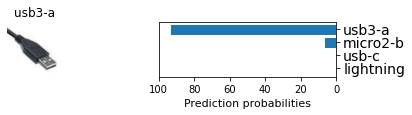

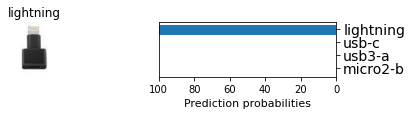

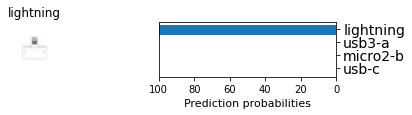

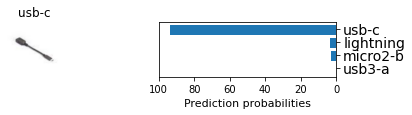

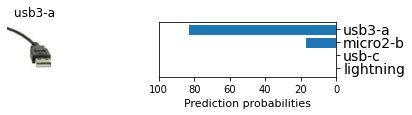

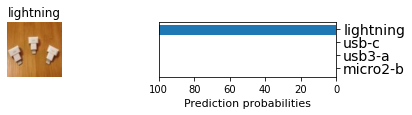

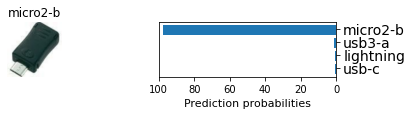

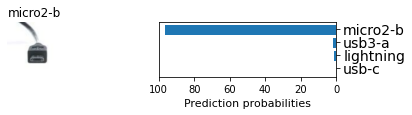

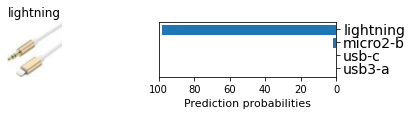

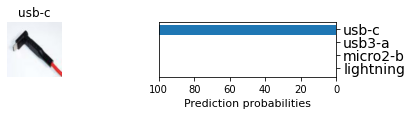

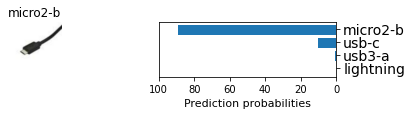

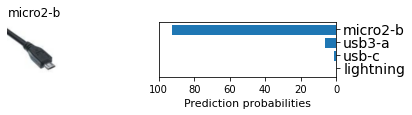

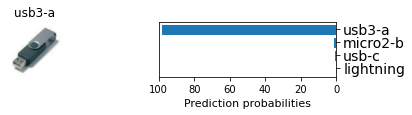

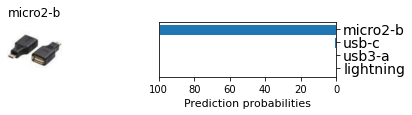

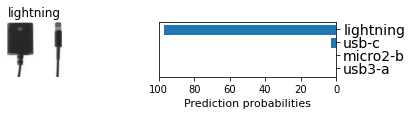

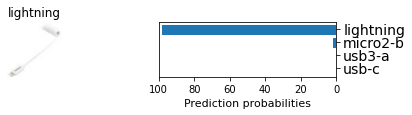

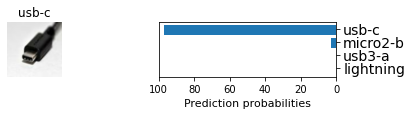

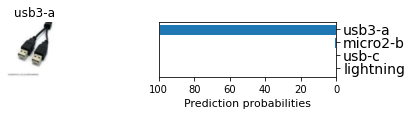

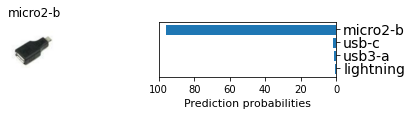

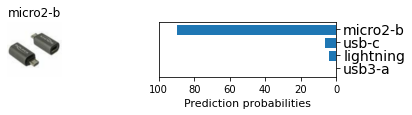

In [ ]:
for features in ds_train.take(20):
  image = features['image']
  image = preprocess_image(image)
  image = tf.image.resize(image, [CROP_TO, CROP_TO])

  logits = saved_module(image)

  show_preds(logits, image[0], correct_usb_label=features['label'].numpy(), tf_usb_logits=True)

In [ ]:
!free -h

In [ ]:
!nvidia-smi

In [ ]:
?model.evaluate

In [ ]:
x = np.array(ds_test)

In [ ]:
x

In [ ]:
?ds.take

In [ ]:
DIR = './img_train/10'
print(sum(os.path.isfile(os.path.join(DIR, name)) for name in os.listdir(DIR)))

500


In [ ]:
#@title #rename the file_name to image_url
import base64
from icrawler import ImageDownloader
from six.moves.urllib.parse import urlparse
from icrawler.builtin import BaiduImageCrawler
from icrawler.builtin import BingImageCrawler
from icrawler.builtin import GoogleImageCrawler
import argparse, os



class Base64NameDownloader(ImageDownloader):
    def get_filename(self, task, default_ext):
        url_path = urlparse(task['file_url'])[2]
        if '.' in url_path:
            extension = url_path.split('.')[-1]
            if extension.lower() not in [
                    'jpg', 'jpeg', 'png', 'bmp', 'tiff', 'gif', 'ppm', 'pgm'
            ]:
                extension = default_ext
        else:
            extension = default_ext
        # works for python 3
        filename = base64.b64encode(url_path.encode()).decode()
        return '{}.{}'.format(filename, extension)

def get_crawler(args, dir_name):
    if engine == "baidu":
        crawler = BaiduImageCrawler(downloader_cls=Base64NameDownloader,storage={'root_dir': dir_name })
    elif engine == "bing":
        crawler = BingImageCrawler(downloader_cls=Base64NameDownloader,storage={'root_dir': dir_name })
    elif engine == "google": # dont work
        crawler = GoogleImageCrawler(storage={'root_dir': dir_name })    
    return crawler

if __name__=="__main__":
    # read ini file.
    with open('./setting.txt', mode='r', encoding = "utf_8") as f:
        read_data = list(f)    

    engine = "bing"
    print("SELECTED ENGINE : "+ "bing")        

    for i in range(len(read_data)):
        print("SEARCH WORD : "+read_data[i].replace('\n', ''))
        print("NUM IMAGES  : "+str(100))
        dir_name = os.path.join("/content/sample_data/dataset", read_data[i].replace('\n', '').replace(' ', '_'))

        #init crawler
        crawler = get_crawler("bing", dir_name)
        crawler.crawl(keyword=read_data[i], max_num=10)

In [ ]:
os.chdir("/content/sample_data/")

In [ ]:
os.chdir('../')

In [ ]:
!pwd

/content/sample_data


In [ ]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
   creating: dataset/different_images/
   creating: dataset/improper_images/
   creating: dataset/lightning/
   creating: dataset/micro2-b/
   creating: dataset/usb3-a/
   creating: dataset/usb-c/


#zip the dataset and download it localy

In [ ]:
os.chdir('/content/sample_data/dataset')

In [ ]:
!zip dataset.zip ./*/*

  adding: lightning/107543.0.jpg (deflated 3%)
  adding: lightning/109391.0.jpg (deflated 2%)
  adding: lightning/109759.0.jpg (deflated 3%)
  adding: lightning/112282.0.jpg (deflated 11%)
  adding: lightning/113018.0.jpg (deflated 2%)
  adding: lightning/120363.0.jpg (deflated 19%)
  adding: lightning/123331.0.jpg (deflated 2%)
  adding: lightning/134766.0.jpg (deflated 19%)
  adding: lightning/138221.0.jpg (deflated 1%)
  adding: lightning/138601.0.jpg (deflated 1%)
  adding: lightning/152685.0.jpg (deflated 2%)
  adding: lightning/176559.0.jpg (deflated 17%)
  adding: lightning/180329.0.jpg (deflated 10%)
  adding: lightning/180425.0.jpg (deflated 10%)
  adding: lightning/195816.0.jpg (deflated 2%)
  adding: lightning/201419.0.jpg (deflated 4%)
  adding: lightning/207386.0.jpg (deflated 30%)
  adding: lightning/209034.0.jpg (deflated 15%)
  adding: lightning/218630.0.jpg (deflated 30%)
  adding: lightning/221860.0.jpg (deflated 5%)
  adding: lightning/224970.0.jpg (deflated 2%)
  ad

In [ ]:
from google.colab import files
files.download('dataset.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>